In [47]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")



In [48]:
data = pd.read_csv('diabetes.csv')

In [49]:
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [50]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [51]:
data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
454,2,100,54,28,105,37.8,0.498,24,0
291,0,107,62,30,74,36.6,0.757,25,1
529,0,111,65,0,0,24.6,0.660,31,0
315,2,112,68,22,94,34.1,0.315,26,0
278,5,114,74,0,0,24.9,0.744,57,0


In [52]:
data.shape,data.size

((768, 9), 6912)

In [53]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [55]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

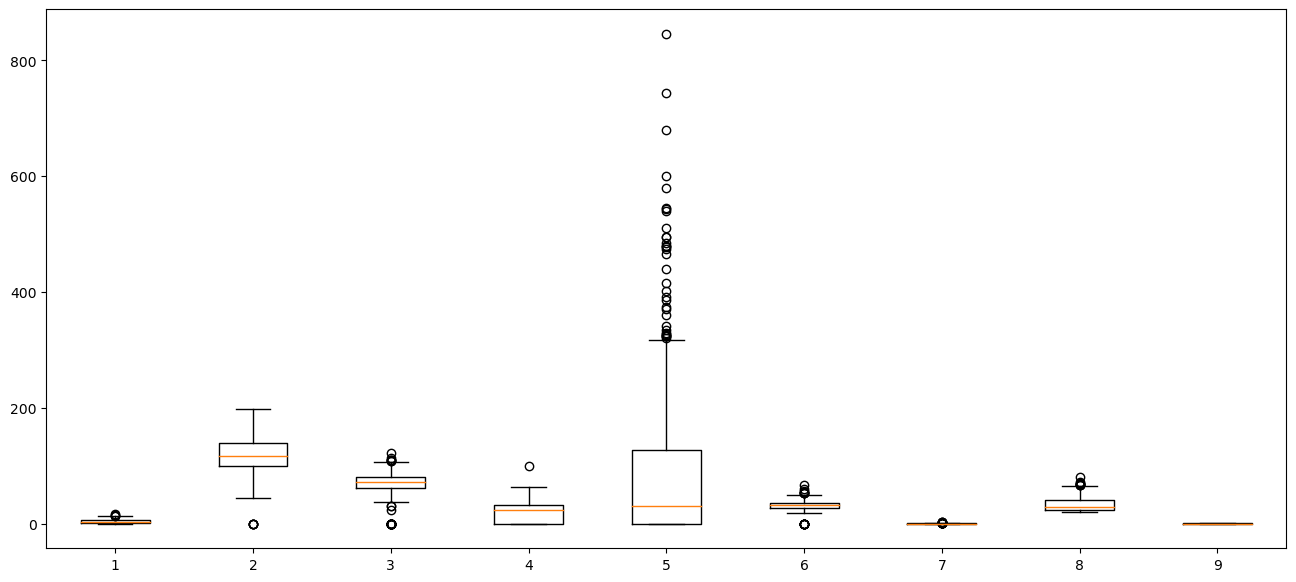

In [56]:
fig,ax=plt.subplots(1,1,figsize=(16,7))
ax.boxplot(data)
plt.show()

In [57]:
data['BMI'].max(),data['BMI'].min(),data['BMI'].mean(),data['BMI'].mode()

(67.1,
 0.0,
 31.992578124999998,
 0    32.0
 Name: BMI, dtype: float64)

In [58]:
# First quartile (Q1) 
Q1 = np.percentile(data['BMI'], 15, interpolation = 'midpoint') 
  
# Third quartile (Q3) 
Q3 = np.percentile(data['BMI'], 85, interpolation = 'midpoint') 
  
# Interquaritle range (IQR) 
IQR = Q3 - Q1 
print("Q1 = ",Q1)
print("Q3 = ",Q3)
print(IQR) 

Q1 =  24.85
Q3 =  39.25
14.399999999999999


In [59]:
(data['BMI']>Q3).sum(),(data['BMI']<Q1).sum()

(116, 116)

In [60]:
np.percentile(data['BMI'], 98.5, interpolation = 'midpoint') 

49.05

In [61]:
val = data['BMI'].sort_values(ascending=False)
print(val[:8])

177    67.1
445    59.4
673    57.3
125    55.0
120    53.2
303    52.9
247    52.3
193    52.3
Name: BMI, dtype: float64


In [62]:
data = data[(data['BMI']>50)==False]

In [63]:
data.shape

(760, 9)

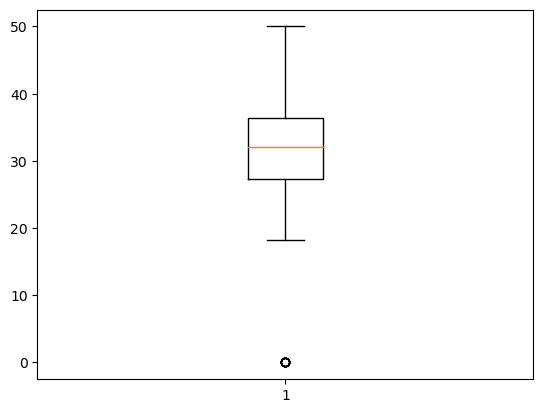

In [64]:
plt.boxplot(data['BMI'])
plt.show()

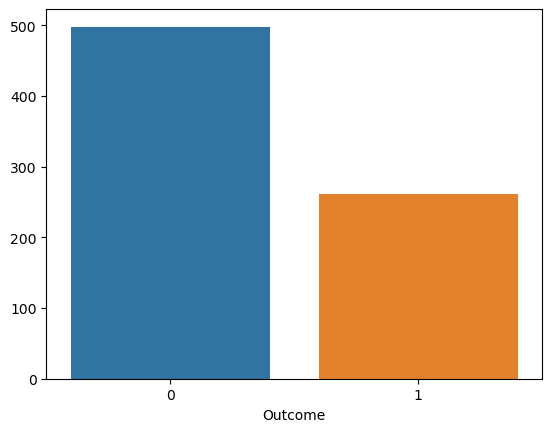

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Outcome' is the column you want to plot
xs = data['Outcome'].value_counts().index
ys = data['Outcome'].value_counts().values

# Use the `x` and `y` parameters in the barplot function
ax = sns.barplot(x=xs, y=ys)

ax.set_xlabel("Outcome")
plt.show()


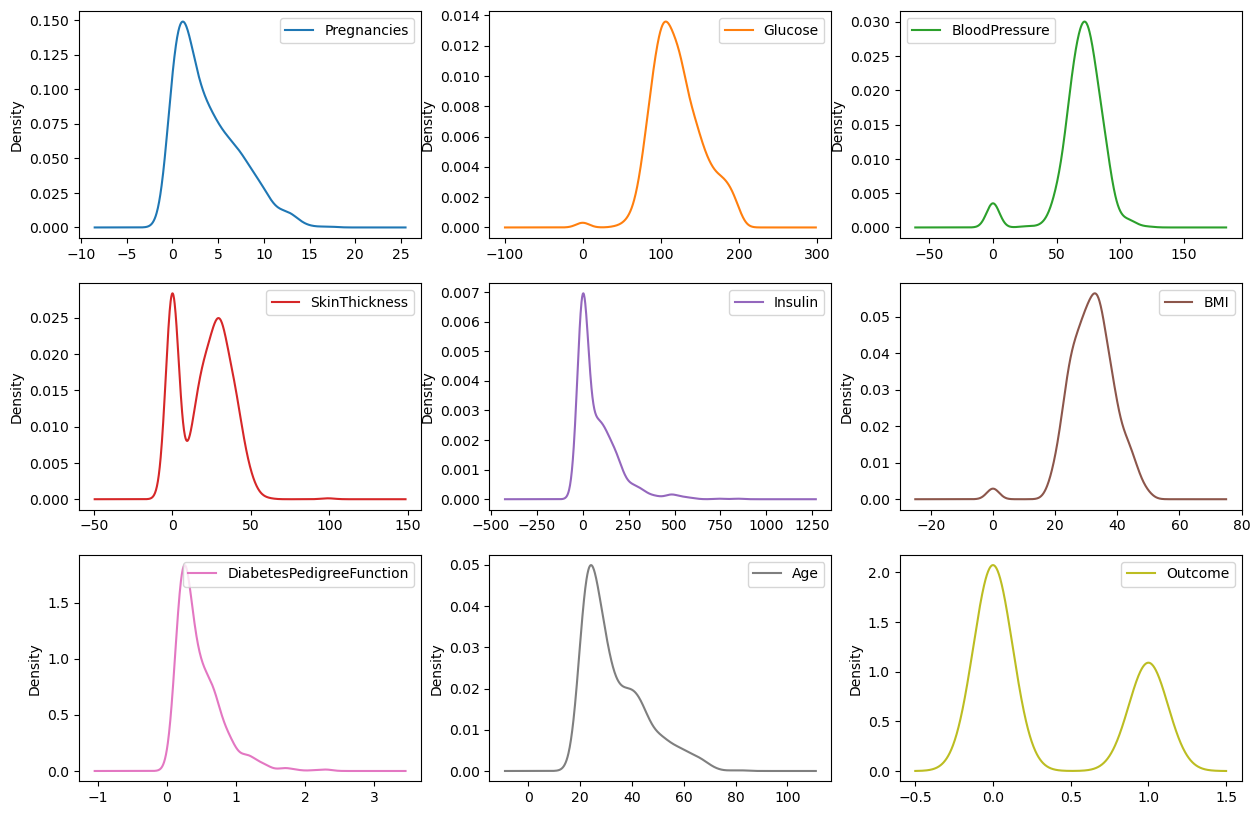

In [66]:
data.plot(kind= 'kde' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,10))
plt.show()

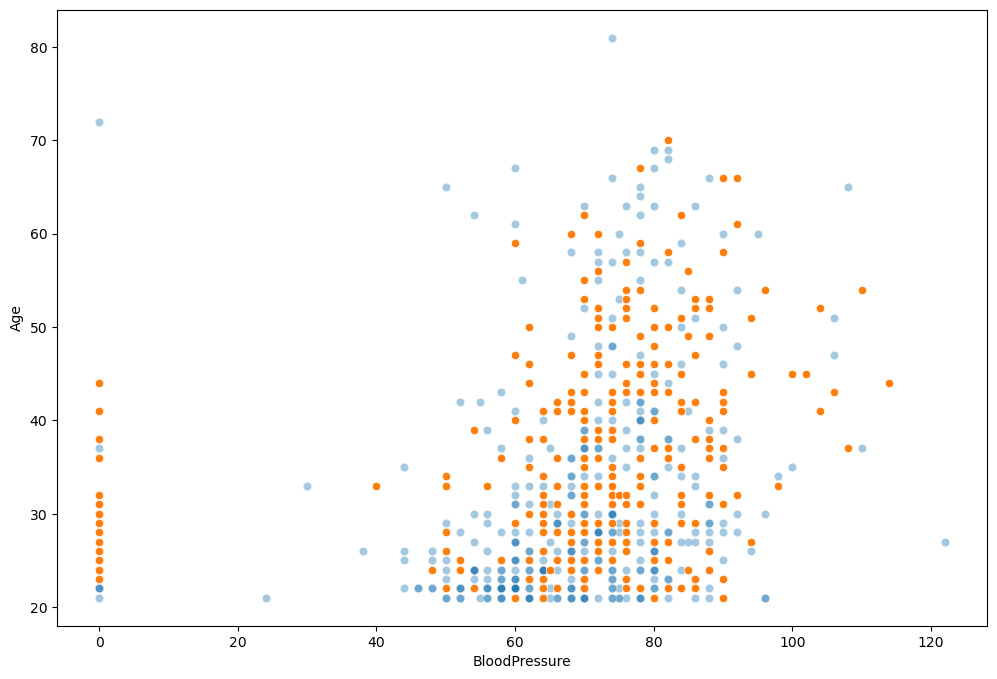

In [67]:
# Age vs BloodPressure with hue = Outcome
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x="BloodPressure", y="Age", alpha=0.4, data=data[data['Outcome'] == 0])
sns.scatterplot(x="BloodPressure", y="Age", alpha=1, data=data[data['Outcome'] == 1], ax=ax)
plt.show()


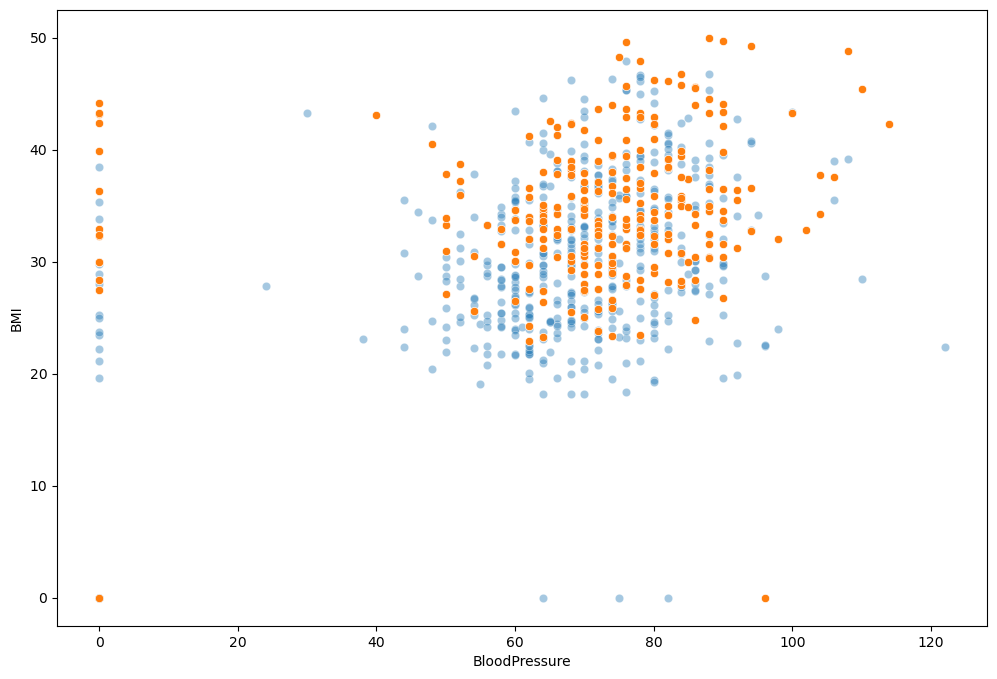

In [68]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(y="BMI", x="BloodPressure", alpha=0.4, data=data[data['Outcome'] == 0])
sns.scatterplot(y="BMI", x="BloodPressure", alpha=1, data=data[data['Outcome'] == 1], ax=ax)
plt.show()

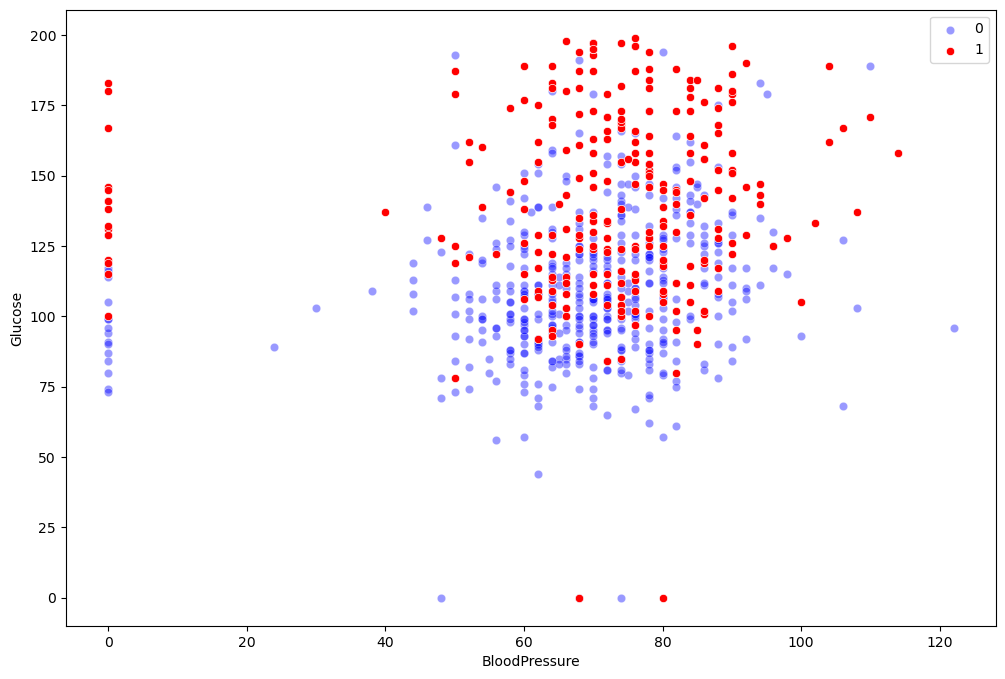

In [69]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(y="Glucose", x="BloodPressure", alpha=0.4, color="blue", label="0", data=data[data['Outcome'] == 0])
sns.scatterplot(x="BloodPressure", y="Glucose", alpha=1, color="red", label="1", data=data[data['Outcome'] == 1], ax=ax)
plt.show()

In [70]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [71]:
pip install --upgrade imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [72]:
pip install scikit-learn==<desired_version>

Note: you may need to restart the kernel to use updated packages.


The syntax of the command is incorrect.


In [73]:
!python -m venv myenv


In [74]:
!myenv\Scripts\activate


In [75]:
!pip install scikit-learn imbalanced-learn


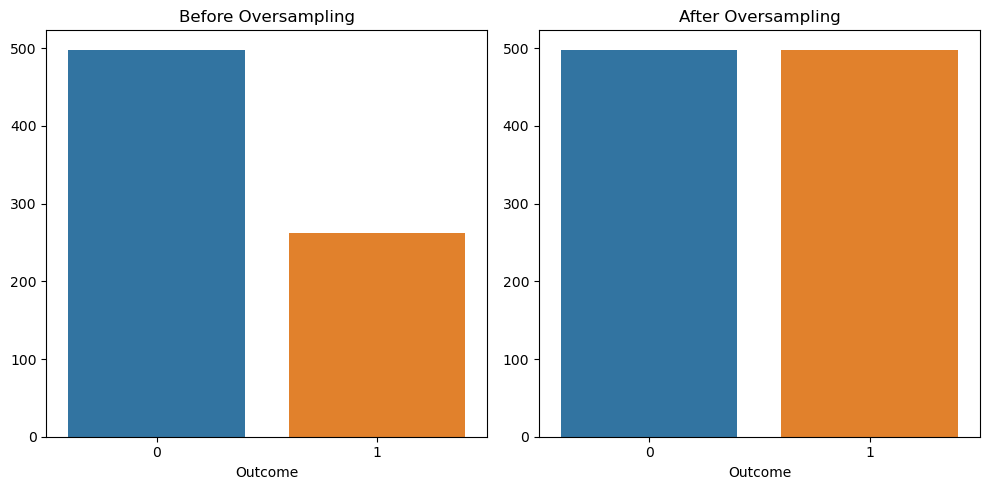

In [76]:
# Splitting into features and value to be predicted
X = data.drop(columns=['Outcome'])
y = data['Outcome']

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot before oversampling
sns.barplot(x=['0', '1'], y=[sum(y == 0), sum(y == 1)], ax=ax[0])
ax[0].set_title("Before Oversampling")
ax[0].set_xlabel('Outcome')

# Using SMOTE to balance the Data
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Plot after oversampling
sns.barplot(x=['0', '1'], y=[sum(y_resampled == 0), sum(y_resampled == 1)], ax=ax[1])
ax[1].set_title("After Oversampling")
ax[1].set_xlabel('Outcome')

plt.tight_layout()
plt.show()


Accuracy Score: 78.29%
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84        96
           1       0.76      0.61      0.67        56

    accuracy                           0.78       152
   macro avg       0.77      0.75      0.76       152
weighted avg       0.78      0.78      0.78       152



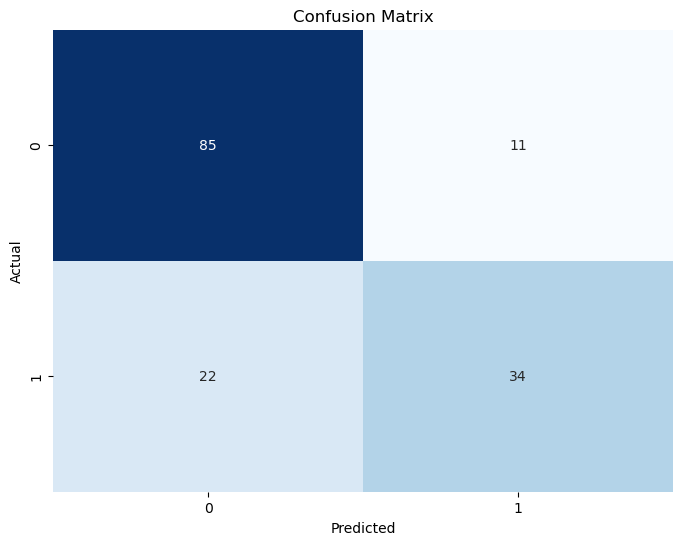

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already defined and split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Your pipeline
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())
pipeline.fit(X_train, y_train)
prediction = pipeline.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, prediction)
print(f"Accuracy Score: {round(accuracy * 100, 2)}%")

# Print classification report
print("Classification Report:\n", classification_report(y_test, prediction))

# Generate confusion matrix
cm = confusion_matrix(y_test, prediction)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [78]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84        96
           1       0.76      0.61      0.67        56

    accuracy                           0.78       152
   macro avg       0.77      0.75      0.76       152
weighted avg       0.78      0.78      0.78       152

